<a href="https://colab.research.google.com/github/DAEHO0/python/blob/main/230825_class2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 1. 모듈과 함수 불러오기
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from google.colab import drive


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Ashopping.csv', encoding = 'cp949')
df

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
0,1,1,4963160,1,22,225598,1,5445,1,3,...,7,6,1,6,3303,0,3,2,1,149.136364
1,2,1,2271520,0,38,59777,22,350995,1,1,...,5,4,0,2,3129,0,5,3,4,81.342105
2,3,1,2484250,0,2,1242125,6,186045,1,2,...,4,6,0,3,3636,0,4,1,4,1817.000000
3,4,1,2778850,0,9,308761,1,5195,2,4,...,4,5,0,4,3637,0,7,4,6,403.111111
4,5,1,4437610,1,10,443761,9,246350,2,4,...,6,6,0,4,3638,0,5,1,4,362.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,12731560,2,35,363759,3,44445,2,3,...,8,6,0,4,4629,1,3,3,1,131.257143
996,997,0,3419010,0,6,569835,6,186545,1,2,...,9,6,0,4,4630,1,7,3,6,770.666667
997,998,0,4612100,1,13,354777,8,260700,2,1,...,1,4,1,6,4631,1,2,1,2,355.230769
998,999,0,5165360,1,28,184477,20,347700,1,3,...,7,5,1,6,3907,0,7,2,6,138.535714


In [5]:
X = df[['총매출액', '1회 평균매출액', '할인권 사용 횟수']]
Y = df['평균 구매주기']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

model = KNeighborsRegressor()

scores = cross_val_score(model, X_train, Y_train, cv = 5)

print(scores)

[0.65777511 0.71775927 0.61704877 0.64648606 0.77413476]


In [6]:
scores.mean()

0.6826407945456794

In [7]:
# K-fold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

X = df[['총매출액', '거래기간', '방문빈도']]
Y = df['이탈여부']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

model = KNeighborsClassifier()

skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)
scores = cross_val_score(model, X_train, Y_train, cv = skf)

print(scores)

[0.64285714 0.7        0.67857143 0.67142857 0.70714286]


In [8]:
# 일변량 통계기반 선택

from sklearn.feature_selection import SelectKBest, chi2

X = df.drop(['고객ID', '이탈여부'], axis = 1)
Y = df['이탈여부']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

feat_sel = SelectKBest(chi2)
feat_sel.fit(X_train, Y_train)

SelectKBest(score_func=<function chi2 at 0x7ca6828a3d90>)

In [9]:
print(feat_sel.scores_)
print()
print(feat_sel.pvalues_)
print()
print(X_train.columns)
feat_score = pd.DataFrame()
feat_score['scores'] = feat_sel.scores_
feat_score['p-value'] = feat_sel.pvalues_
feat_score['feature'] = X_train.columns
feat_score['support'] = feat_sel.get_support()
feat_score

[5.82352766e+07 1.77986311e+01 5.96293346e+02 8.18632483e+06
 1.52512773e+00 1.42526333e+03 4.22324424e-02 1.34274043e+00
 4.52455984e+00 2.83370228e+00 1.39291888e-03 9.68374240e+00
 6.64526668e-03 1.45911874e+04 4.65706599e+01 1.46967566e-06
 7.90404039e+00 7.28701471e-02 8.62829933e+03]

[0.00000000e+000 2.45559852e-005 1.07159333e-131 0.00000000e+000
 2.16845161e-001 0.00000000e+000 8.37177331e-001 2.46551265e-001
 3.34116693e-002 9.23053421e-002 9.70228401e-001 1.85905586e-003
 9.35029609e-001 0.00000000e+000 8.83735846e-012 9.99032723e-001
 4.93245008e-003 7.87202789e-001 0.00000000e+000]

Index(['총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수', '총 할인 금액', '고객등급',
       '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대', '거래기간', '할인민감여부',
       'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')


,scores,p-value,feature,support
0,5.823528e+07,0.000000e+00,총매출액,True
1,1.779863e+01,2.455599e-05,구매금액대,True
2,5.962933e+02,1.071593e-131,방문빈도,True
3,8.186325e+06,0.000000e+00,1회 평균매출액,True
4,1.525128e+00,2.168452e-01,할인권 사용 횟수,False
5,1.425263e+03,0.000000e+00,총 할인 금액,True
6,4.223244e-02,8.371773e-01,고객등급,False
7,1.342740e+00,2.465513e-01,구매유형,False
8,4.524560e+00,3.341167e-02,클레임접수여부,False
9,2.833702e+00,9.230534e-02,구매카테고리수,False


In [10]:
print(feat_sel.scores_)
print()
print(feat_sel.pvalues_)
print()
print(X_train.columns)

[5.82352766e+07 1.77986311e+01 5.96293346e+02 8.18632483e+06
 1.52512773e+00 1.42526333e+03 4.22324424e-02 1.34274043e+00
 4.52455984e+00 2.83370228e+00 1.39291888e-03 9.68374240e+00
 6.64526668e-03 1.45911874e+04 4.65706599e+01 1.46967566e-06
 7.90404039e+00 7.28701471e-02 8.62829933e+03]

[0.00000000e+000 2.45559852e-005 1.07159333e-131 0.00000000e+000
 2.16845161e-001 0.00000000e+000 8.37177331e-001 2.46551265e-001
 3.34116693e-002 9.23053421e-002 9.70228401e-001 1.85905586e-003
 9.35029609e-001 0.00000000e+000 8.83735846e-012 9.99032723e-001
 4.93245008e-003 7.87202789e-001 0.00000000e+000]

Index(['총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수', '총 할인 금액', '고객등급',
       '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대', '거래기간', '할인민감여부',
       'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')


In [11]:
from sqlalchemy.sql.base import ColumnSet
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

feat_sel = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 0), threshold= 'median')
feat_sel.fit(X_train, Y_train)

feat_score = pd.DataFrame()
feat_score['suuport'] = feat_sel.get_support()
feat_score['feature'] = X_train.columns
feat_score

,suuport,feature
0,True,총매출액
1,False,구매금액대
2,True,방문빈도
3,True,1회 평균매출액
4,True,할인권 사용 횟수
5,True,총 할인 금액
6,False,고객등급
7,False,구매유형
8,False,클레임접수여부
9,False,구매카테고리수


In [12]:
# 반복적 변수 선택

from sklearn.feature_selection import RFE
import numpy as np

In [13]:
RFE(RandomForestClassifier(n_estimators = 100, random_state = 0))
feat_sel.fit(X_train, Y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=0),
                threshold='median')

In [14]:
feat_score = pd.DataFrame()
feat_score['support'] = feat_sel.get_support()
feat_score['feature'] = X_train.columns
feat_score

,support,feature
0,True,총매출액
1,False,구매금액대
2,True,방문빈도
3,True,1회 평균매출액
4,True,할인권 사용 횟수
5,True,총 할인 금액
6,False,고객등급
7,False,구매유형
8,False,클레임접수여부
9,False,구매카테고리수


In [15]:
# undersampling

from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

X_train_under, Y_train_under = RandomUnderSampler(random_state = 0).fit_resample(X_train, Y_train)

print(Counter(Y))
print(Counter(Y_train))
print(Counter(Y_train_under))

Counter({0: 700, 1: 300})
Counter({0: 481, 1: 219})
Counter({0: 219, 1: 219})


In [16]:
# oversampling

from imblearn.over_sampling import SMOTE

X_train_over, Y_train_over = SMOTE(random_state = 0).fit_resample(X_train, Y_train)

print(Counter(Y))
print(Counter(Y_train))
print(Counter(Y_train_over))

Counter({0: 700, 1: 300})
Counter({0: 481, 1: 219})
Counter({1: 481, 0: 481})


In [17]:
# grid search

from sklearn.model_selection import GridSearchCV

X = df[['총매출액', '거래기간', '방문빈도']]
Y = df['이탈여부']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [22]:
parameter_grid = {'n_neighbors' : [i for i in range(1, 50) if i % 2 != 0]}
# 인접이웃을 짝수로 설정하면 동률이 나와 분류를 못하는 상황이 생기므로 무조건 홀수로 정함
# parameter_grid

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid = parameter_grid, cv = 10)
grid_search.fit(X_train, Y_train)

print(grid_search.best_params_)

{'n_neighbors': 9}


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [25]:
df.head()

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
0,1,1,4963160,1,22,225598,1,5445,1,3,...,7,6,1,6,3303,0,3,2,1,149.136364
1,2,1,2271520,0,38,59777,22,350995,1,1,...,5,4,0,2,3129,0,5,3,4,81.342105
2,3,1,2484250,0,2,1242125,6,186045,1,2,...,4,6,0,3,3636,0,4,1,4,1817.000000
3,4,1,2778850,0,9,308761,1,5195,2,4,...,4,5,0,4,3637,0,7,4,6,403.111111
4,5,1,4437610,1,10,443761,9,246350,2,4,...,6,6,0,4,3638,0,5,1,4,362.800000


In [34]:
X = df[['총매출액', '거래기간', '방문빈도']]
Y = df['이탈여부']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

col_name = X_train.columns

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = col_name)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = col_name)
display(X_train_scaled)

[[ 0.69336175  0.22690456  0.03475125]
 [-0.225208   -0.02778804 -0.17540748]
 [-0.52055725  0.61729402  0.98046554]
 ...
 [-0.60960507  0.55779616 -0.01778844]
 [-0.02842033 -0.64468689 -0.22794717]
 [-0.30394592  0.83127755 -0.70080431]]


,총매출액,거래기간,방문빈도
0,0.693362,0.226905,0.034751
1,-0.225208,-0.027788,-0.175407
2,-0.520557,0.617294,0.980466
3,0.614883,0.533788,-0.280487
4,-0.590701,0.570322,-0.385566
...,...,...,...
695,-0.042241,0.988895,-0.648265
696,-0.636006,0.317717,-0.700804
697,-0.609605,0.557796,-0.017788
698,-0.028420,-0.644687,-0.227947


In [36]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state = 0)
X_train_over, Y_train_over = smote.fit_resample(X_train_scaled, Y_train)

print(Counter(Y))
print(Counter(Y_train))
print(Counter(Y_train_over))

Counter({0: 700, 1: 300})
Counter({0: 481, 1: 219})
Counter({1: 481, 0: 481})


In [39]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C = 1, random_state = 0)

model.fit(X_train_over, Y_train_over)

y_pred = model.predict(X_test_scaled)
print(y_pred)

[1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1
 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1
 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0
 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0
 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0
 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1
 0 1 0 1]


In [40]:
model.score(X_test_scaled, Y_test)

0.7033333333333334

In [41]:
# KNN

X = df[['총매출액', '방문빈도', '1회 평균매출액', '거래기간', '평균 구매주기']]
Y = df['이탈여부']

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [43]:
col_name = X_train.columns
scaler = StandardScaler().fit(X_train)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = col_name)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = col_name)

In [44]:
X_train_over, Y_train_over = SMOTE(random_state = 0).fit_resample(X_train_scaled, Y_train)

In [46]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 7, metric = 'euclidean')

model.fit(X_train_over, Y_train_over)
y_pred = model.predict(X_test_scaled)

In [48]:
from sklearn.metrics import classification_report # 분류 보고서

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81       219
           1       0.53      0.81      0.64        81

    accuracy                           0.75       300
   macro avg       0.72      0.77      0.73       300
weighted avg       0.81      0.75      0.77       300



In [49]:
# 의사결정나무

X = df[['총매출액', '구매금액대', '할인권 사용 횟수', '총 할인 금액', '구매유형', '구매카테고리수', '성별',
        '거래기간', '방문빈도', '할인민감여부']]
Y = df['이탈여부']

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [56]:
col_name = X_train.columns
scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = col_name)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = col_name)

In [57]:
smote = SMOTE(random_state = 0)
X_train_over, Y_train_over = smote.fit_resample(X_train_scaled, Y_train)

In [58]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 0, max_depth = 3)

model.fit(X_train_over, Y_train_over)
y_pred = model.predict(X_test_scaled)

In [59]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86       219
           1       0.61      0.79      0.69        81

    accuracy                           0.81       300
   macro avg       0.76      0.80      0.77       300
weighted avg       0.83      0.81      0.81       300



In [60]:
feature_name = X_train.columns
feature_importances = model.feature_importances_
feature = pd.DataFrame()
feature['name'] = feature_name
feature['importance'] = feature_importances
feature = feature.sort_values('importance', ascending = False) # 내림차순 정렬
feature

,name,importance
7,거래기간,0.904616
8,방문빈도,0.095214
3,총 할인 금액,0.000170
0,총매출액,0.000000
1,구매금액대,0.000000
2,할인권 사용 횟수,0.000000
4,구매유형,0.000000
5,구매카테고리수,0.000000
6,성별,0.000000
9,할인민감여부,0.000000


In [63]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model, out_file = '/content/drive/MyDrive/tree.dot', class_names = ['비이탈', '이탈'],
                feature_names = feature_name, impurity = True, filled = True)

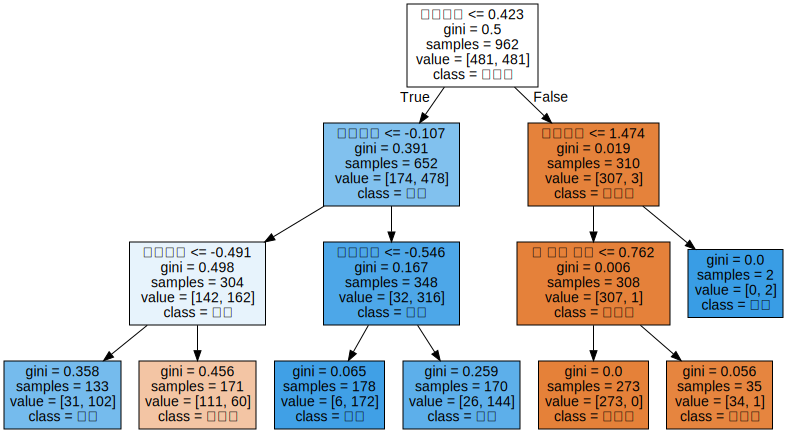

In [64]:
with open('/content/drive/MyDrive/tree.dot', encoding = 'utf-8') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)